In [2]:
# Heaviside function with a default epsilon
g <- function(net, epsilon=0.5) {
	if (net > epsilon) {
		return (1)
	} else {
		return (0)
	}
}

In [3]:
# This is the function to train the Perceptron
# Observe eta and threshold assume default values
perceptron.train <- function(train.table, eta=0.1, threshold=1e-2) {

	# Number of input variables
	nVars = ncol(train.table)-1

	cat("Randomizing weights and theta in range [-0.5, 0.5]...\n")

	# Randomizing weights
	weights = runif(min=-0.5, max=0.5, n=nVars)

	# Randomizing theta
	theta = runif(min=-0.5, max=0.5, n=1)

	# This sum of squared errors will accumulate all errors
	# occuring along training iterations. When this error is
	# below a given threshold, learning stops.
	sumSquaredError = 2*threshold

	# Learning iterations
	while (sumSquaredError > threshold) {

		# Initializing the sum of squared errors as zero
		# to start counting and later evaluate the total
		# loss for this dataset in train.table
		sumSquaredError = 0

		# Iterate along all rows (examples) contained in
		# train.table
		for (i in 1:nrow(train.table)) {

			# Example x_i
			x_i = train.table[i, 1:nVars]

			# Expected output class
			# Observe the last column of this table
			# contains the output class
			y_i = train.table[i, ncol(train.table)]

			# Now the Perceptron produces the output
			# class using the current values for 
			# weights and theta, then it applies the
			# heaviside function
			hat_y_i = g(x_i %*% weights + theta)

			# This is the error, referred to as (y_i - g(x_i))
			# in the Perceptron formulation
			Error = y_i - hat_y_i

			# As part of the Gradient Descent method, we here
			# compute the partial derivative of the Squared Error
			# for the current example i in terms of weights and theta.
			# Observe constant 2 is not necessary, once we
			# can set eta using the value we desire
			dE2_dw1 = 2 * Error * -x_i
			dE2_dtheta = 2 * Error * -1

			# This is the Gradient Descent method to adapt
			# weights and theta as defined in the formulation
			weights = weights - eta * dE2_dw1
			theta = theta - eta * dE2_dtheta

			# Accumulating the squared error to define the stop criterion
			sumSquaredError = sumSquaredError + Error^2
		}

		cat("Accumulated sum of squared errors = ", sumSquaredError, "\n")
	}

	# Returning weights and theta, once they represent the solution
	ret = list()
	ret$weights = weights
	ret$theta = theta

	return (ret)
}


In [4]:
# This is the function to execute the Perceptron
# over unseen data (new examples)
perceptron.test <- function(test.table, weights, theta) {

	# Here we print out the expected class (yi) followed by the
	# obtained one (hat_yi) when considering weights and theta.
	# Of course, function perceptron.train should be called
	# previously, in order to find the values for weights and theta
	cat("#yi\that_yi\n")

	# Number of input variables
	nVars = ncol(test.table)-1

	# For every row in the test.table
	for (i in 1:nrow(test.table)) {

		# Example i
		x_i = test.table[i, 1:nVars]

		# Expected class for example i
		y_i = test.table[i, ncol(test.table)]

		# Output class produced by the Perceptron
		hat_y_i = g(x_i %*% weights + theta)

		cat(y_i, "\t", hat_y_i, "\n")
	}
}


In [5]:
perceptron.run.simple <- function() {

	# This is a table with training examples
	train.table = matrix(c(0.0, 0,
			       0.1, 0,
			       0.2, 0,
			       0.3, 0,
			       0.4, 0,
			       0.5, 0,
			       0.6, 1,
			       0.7, 1,
			       0.8, 1,
			       0.9, 1,
			       1.0, 1),
			      nrow=11,
			      ncol=2,
			      byrow=TRUE)

	# This is a table with test examples.
	# The last column only shows the expected
	# output and it is not used in the testing stage
	test.table = matrix(c(0.05, 0,
			      0.15, 0,
			      0.25, 0,
			      0.35, 0,
			      0.45, 0,
			      0.55, 1,
			      0.65, 1,
			      0.75, 1,
			      0.85, 1,
			      0.95, 1),
			     nrow=10,
			     ncol=2,
			     byrow=TRUE)

	# Training the Perceptron to find weights and theta
	training.result = perceptron.train(train.table)

	# Testing the Perceptron with the weights and theta found
	perceptron.test(test.table, training.result$weights, training.result$theta)

	return (training.result)
}

In [7]:
perceptron.run.simple()

Randomizing weights and theta in range [-0.5, 0.5]...
Accumulated sum of squared errors =  2 
Accumulated sum of squared errors =  1 
Accumulated sum of squared errors =  2 
Accumulated sum of squared errors =  1 
Accumulated sum of squared errors =  0 
#yi	hat_yi
0 	 0 
0 	 0 
0 	 0 
0 	 0 
0 	 0 
1 	 1 
1 	 1 
1 	 1 
1 	 1 
1 	 1 


$weights
[1] 0.4915585

$theta
[1] 0.2364631

In [8]:
# This function plots the hyperplane found for this simplest
# problem which considers a single input variable.
# Variables range.start and range.end define the interval of
# values for the single input variable composing the problem.
# This simple problem has a single variable composing every
# example i, which is x_i,1
perceptron.simple.hyperplane.plot <- function(weight, theta, range.start=0, range.end=1) {

	# Number of variables is 1
	nVars = 1

	# We will now define the same range for the input variable.
	# This range will contain 100 discretized values
	range_of_every_input_variable = seq(range.start, range.end, length=100)
	x_1 = range_of_every_input_variable
	
	# Computing net for every input value of variable x_i,1
	all_nets = cbind(x_1, 1) %*% c(weight, theta)

	# This variable all_nets contains all net values for all values assumed
	# by variable x_1. Variable hat_y will contain the Perceptron outputs after
	# applying the heaviside function
	hat_y = rep(0, length(all_nets))
	for (i in 1:length(all_nets)) {
		hat_y[i] = g(all_nets[i])
	}

	# Variable hyperplane will contain two columns, the first corresponds to
	# the input value of x_i,1 and the second to the class produced by the
	# Perceptron
	hyperplane = cbind(x_1, hat_y)

	# Plotting the hyperplane found by the Perceptron
	plot(hyperplane)
   
   plot(x_1, hat_y, cex.axis=1.25, cex=1.3, xlab="input x_1", ylab="output hat_y (classes) and hyperplane (w,theta)", cex.lab=1.25, yaxt="n", ylim=c(-0.1,1.1))
   lines(hyperplane, lwd=2.3, col="gray40",lty=2)
   axis(2, at=c(0,1), labels=c(0,1), cex.axis=1.25,cex.lab=1.25)

	return (hyperplane)
}

x_1,hat_y
0.00000000,0
0.01010101,0
0.02020202,0
0.03030303,0
0.04040404,0
0.05050505,0
0.06060606,0
0.07070707,0
0.08080808,0
0.09090909,0


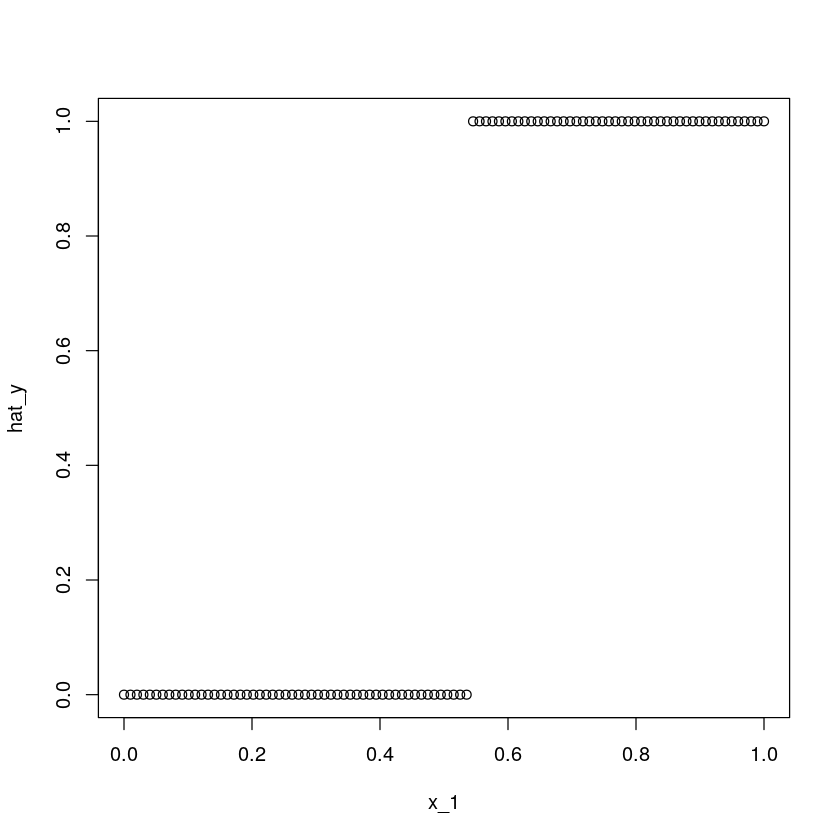

In [9]:
perceptron.simple.hyperplane.plot(0.491558475960046, 0.236463076760992)